# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"{cities}")
print(f"Number of cities in the list: {len(cities)}")

['isafjordur', 'fale old settlement', 'albany', 'georgetown', 'tumayr', 'namibe', 'horta', 'cabo san lucas', 'port-aux-francais', 'burang', 'punta arenas', 'happy valley-goose bay', 'taiohae', 'waitangi', "tyul'kubas", 'west island', 'northam', 'iqaluit', 'grand-bassam', 'edinburgh of the seven seas', 'grytviken', 'ilulissat', 'hermanus', 'lebu', 'lazaro cardenas', 'enewetak', 'talnakh', 'gewane', 'puerto cabello', 'qaqortoq', 'port elizabeth', 'fortuna', 'beloyarskiy', 'capayan', 'fairfield', 'bethel', 'plettenberg bay', 'howard springs', 'hamilton', 'norilsk', 'chhabra', 'bredasdorp', 'revda', 'sittwe', 'adamstown', 'izazi', 'touros', 'kolodeznyy', 'pokhara', 'tirano', 'puerto san carlos', 'selfoss', 'i-n-salah', 'ballina', 'uturoa', 'whitehorse', 'kuala terengganu', 'angaur state', 'afaahiti', 'kavaratti', 'aasiaat', 'beira', 'kokpekty', 'kodiak', 'safotu', 'iguatu', 'puerto natales', 'santyoku', 'blackmans bay', 'howrah', 'kyren', 'bilibino', 'carmo', 'collie', 'fort mcmurray', 'is

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [55]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isafjordur
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | tumayr
Processing Record 6 of Set 1 | namibe
Processing Record 7 of Set 1 | horta
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | burang
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | happy valley-goose bay
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | tyul'kubas
City not found. Skipping...
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | grand-bassam
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing 

In [56]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df  = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [57]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isafjordur,66.0755,-23.1240,271.85,80,100,5.57,IS,1702951168
1,fale old settlement,-9.3852,-171.2468,302.19,74,100,1.27,TK,1702951168
2,albany,42.6001,-73.9662,279.59,83,77,3.70,US,1702950925
3,georgetown,5.4112,100.3354,301.11,82,20,2.06,MY,1702951077
4,tumayr,25.7039,45.8680,286.07,74,80,3.09,SA,1702951169


In [58]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [59]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isafjordur,66.0755,-23.1240,271.85,80,100,5.57,IS,1702951168
1,fale old settlement,-9.3852,-171.2468,302.19,74,100,1.27,TK,1702951168
2,albany,42.6001,-73.9662,279.59,83,77,3.70,US,1702950925
3,georgetown,5.4112,100.3354,301.11,82,20,2.06,MY,1702951077
4,tumayr,25.7039,45.8680,286.07,74,80,3.09,SA,1702951169


In [60]:
# Get the information on the DataFrame
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 556
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        557 non-null    object 
 1   Lat         557 non-null    float64
 2   Lng         557 non-null    float64
 3   Max Temp    557 non-null    float64
 4   Humidity    557 non-null    int64  
 5   Cloudiness  557 non-null    int64  
 6   Wind Speed  557 non-null    float64
 7   Country     551 non-null    object 
 8   Date        557 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.5+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

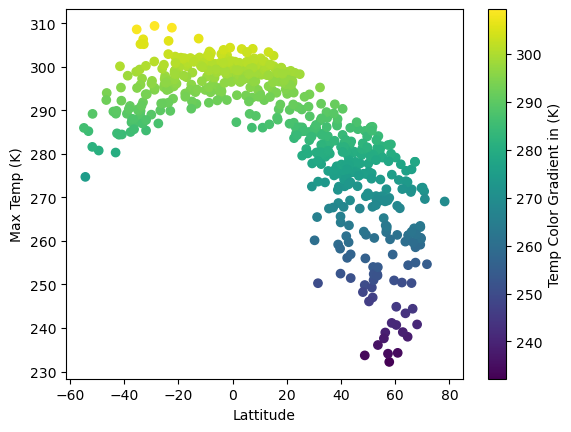

<Figure size 640x480 with 0 Axes>

In [61]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df["Max Temp"],c=city_data_df['Max Temp'])
clb1 = plt.colorbar()
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (K)")
clb1.set_label("Temp Color Gradient in (K)")
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

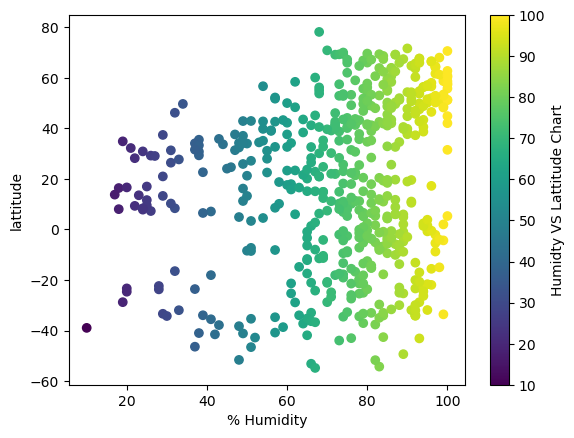

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"],city_data_df['Lat'],c=city_data_df['Humidity'])
clb2 = plt.colorbar()


# Incorporate the other graph properties
plt.xlabel("% Humidity")
plt.ylabel("lattitude")
clb2.set_label("Humidty VS Lattitude Chart")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

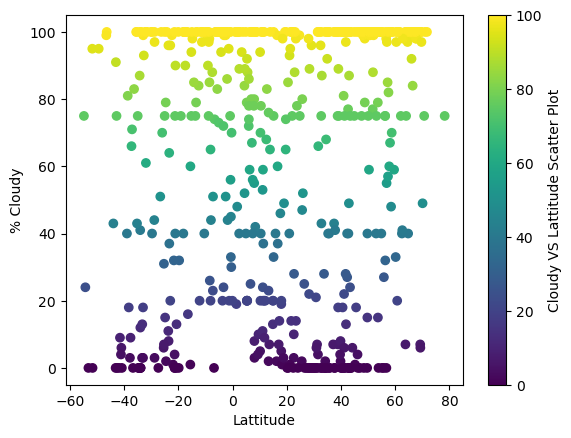

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df["Cloudiness"],c=city_data_df['Cloudiness'])
clb3 = plt.colorbar()


# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("% Cloudy")
clb3.set_label("Cloudy VS Lattitude Scatter Plot")

# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()





#### Latitude vs. Wind Speed Plot

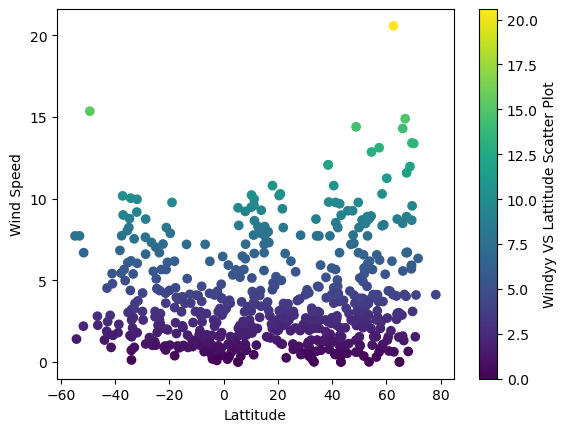

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df["Wind Speed"],c=city_data_df['Wind Speed'])
clb4 = plt.colorbar()


# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed")
clb4.set_label("Windyy VS Lattitude Scatter Plot")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
import scipy.stats as st
Lattitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
cloud = city_data_df['Cloudiness']
humid = city_data_df['Humidity']
temp = city_data_df['Max Temp']
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(wind,Lattitude)[0],2)}")
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(cloud,Lattitude)[0],2)}")
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(humid,Lattitude)[0],2)}")
print(f"The correlation coefficient between wind speed and lattitude is {round(st.pearsonr(temp,Lattitude)[0],2)}")


The correlation coefficient between wind speed and lattitude is 0.1
The correlation coefficient between wind speed and lattitude is 0.14
The correlation coefficient between wind speed and lattitude is 0.2
The correlation coefficient between wind speed and lattitude is -0.71


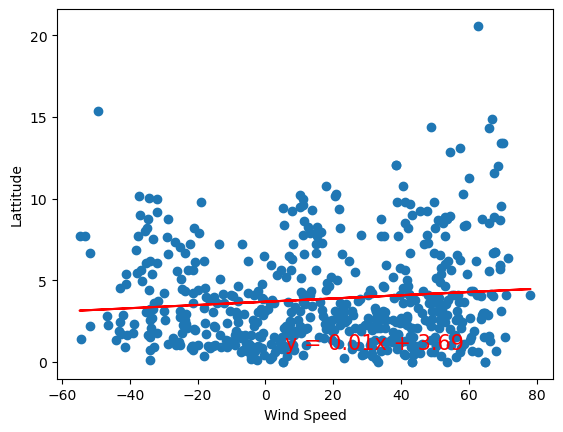

In [66]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Add the linear regression equation and line to plot
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lattitude')
plt.show()


In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Display the first few rows of the new DataFrame to verify
print(northern_hemisphere_df.head())



               City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
0        isafjordur  66.0755  -23.1240    271.85        80         100   
2            albany  42.6001  -73.9662    279.59        83          77   
3        georgetown   5.4112  100.3354    301.11        82          20   
4            tumayr  25.7039   45.8680    286.07        74          80   
6             horta  38.5333  -28.6333    286.49        90         100   

         Wind Speed Country        Date  
City_ID                                  
0              5.57      IS  1702951168  
2              3.70      US  1702950925  
3              2.06      MY  1702951077  
4              3.09      SA  1702951169  
6             12.07      PT  1702951169  


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df["Lat"] <= 0]

# Display the first few rows of the new DataFrame to verify
print(southern_hemisphere_df.head())

# Display sample data
southern_hemisphere_df.head()

                        City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                               
1        fale old settlement  -9.3852 -171.2468    302.19        74   
5                     namibe -15.1961   12.1522    295.91        81   
8          port-aux-francais -49.3500   70.2167    280.76        89   
10              punta arenas -53.1500  -70.9167    285.21        66   
12                  waitangi -43.9535 -176.5597    289.72        73   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
1               100        1.27      TK  1702951168  
5                94        2.21      AO  1702951169  
8                95       15.36      TF  1702951169  
10                0        7.72      CL  1702951048  
12               43        1.34      NZ  1702951170  


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fale old settlement,-9.3852,-171.2468,302.19,74,100,1.27,TK,1702951168
5,namibe,-15.1961,12.1522,295.91,81,94,2.21,AO,1702951169
8,port-aux-francais,-49.3500,70.2167,280.76,89,95,15.36,TF,1702951169
10,punta arenas,-53.1500,-70.9167,285.21,66,0,7.72,CL,1702951048
12,waitangi,-43.9535,-176.5597,289.72,73,43,1.34,NZ,1702951170


###  Temperature vs. Latitude Linear Regression Plot

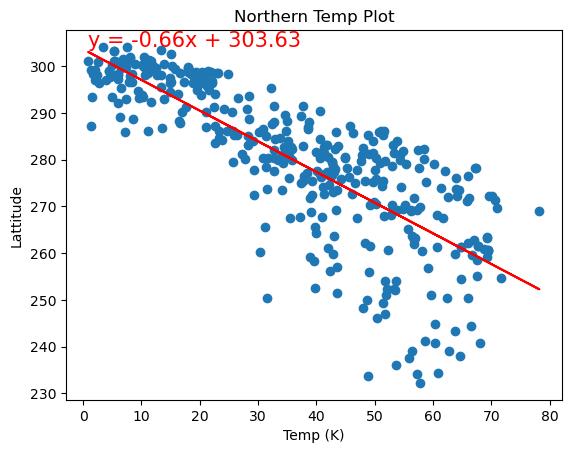

In [77]:
# Linear regression on Northern Hemisphere
#####################################################
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(min(x_values), max(y_values)),fontsize=15,color="red")
plt.xlabel('Temp (K)')
plt.ylabel('Lattitude')
plt.title("Northern Temp Plot")
plt.show()


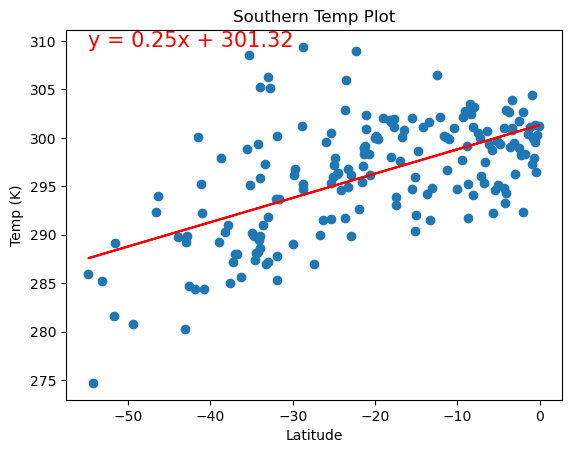

In [78]:
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Temp (K)')
plt.title("Southern Temp Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# by analyzing the charts of temperature vs lattitude between the northern and southern hemisphere, 
#you can see a strong inverse relationship indicating older temps further from the equator.

### Humidity vs. Latitude Linear Regression Plot

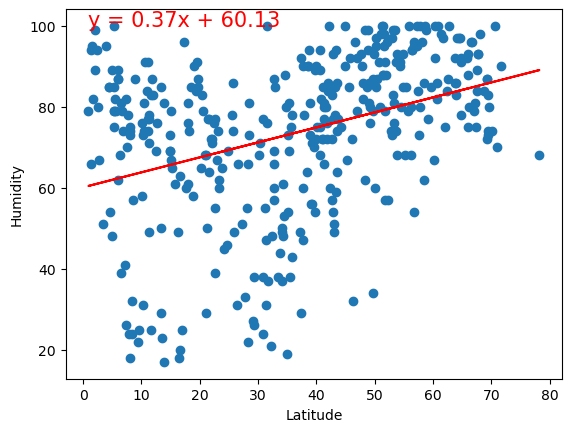

In [71]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Humidity Plot")
plt.show()

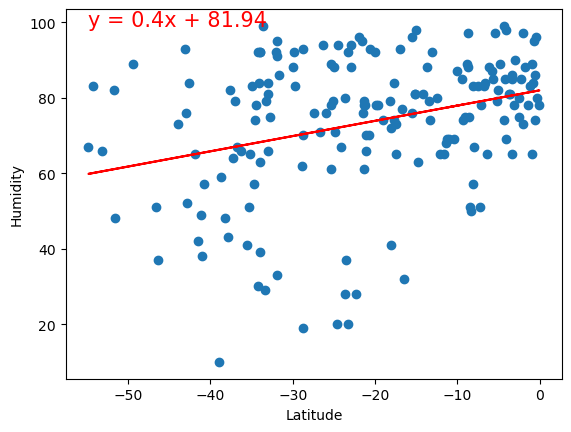

In [72]:
# Southern Hemisphere

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Humidity Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# By viewing the two hemisphere plots on humidity, you can see a similar relationship of higher humidity near 
#the equator. With Southern hemispher being slightly more humid than northern hemisphere. This logic makes sense since 
# the southern hemisphere has less land than the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

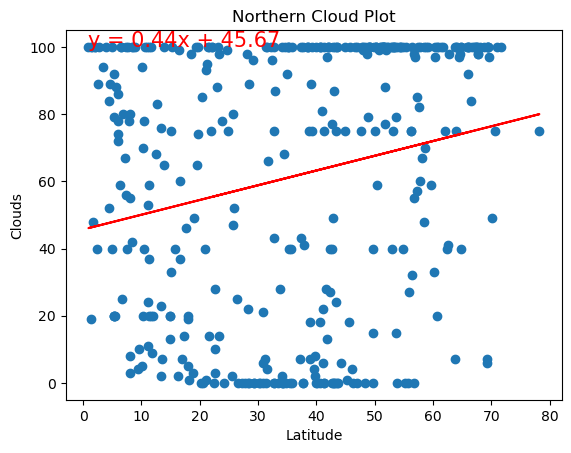

In [79]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title("Northern Cloud Plot")
plt.show()

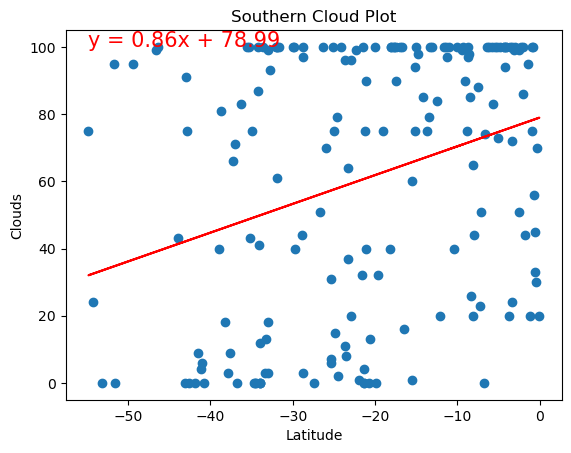

In [80]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title("Southern Cloud Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The two hemisphere plots for clouds indicate an increasing amount of cloud cover the further north you are located.

### Wind Speed vs. Latitude Linear Regression Plot

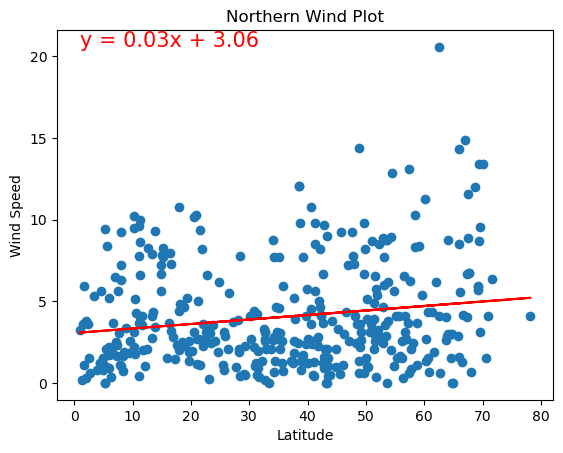

In [81]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Wind Plot")
plt.show()

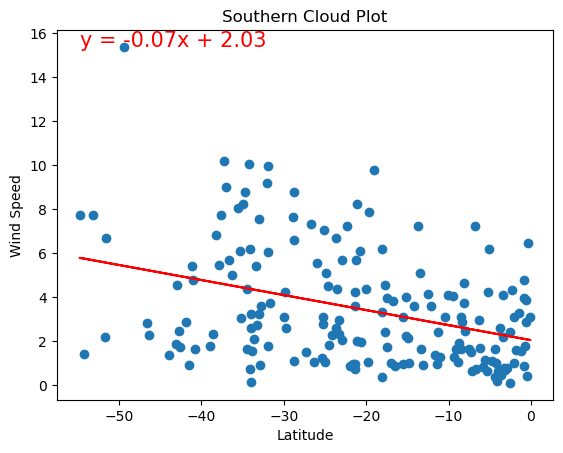

In [82]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Add the linear regression equation and line to plot
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Adjust the position in the annotate function as needed
plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=15, color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Cloud Plot")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# The two hemisphere cloud plots indicate less wind as you approach the equator. This makes sense as the equator is the
# center of these hemispheres and based on Earth's axis, direction of rotation, and heat from the sun, this causes the coriolis effect and the "doldrums".